## 地图
地图通过经纬度标明位置，其中经度正数为东经，负数为西经，纬度正数为北纬，负数为南纬

地理空间数据常用的有几类：
DEM,POI,OSM

OSM 是Open Street Map的缩写，是一款由网络大众打造的免费开源、可编辑的地图服务。

DEM数据,数字高程模型（Digital Elevation Model)，简称DEM

POI数据,POI是“Point of Interest”的缩写，可以翻译成“兴趣点”，也有些叫做“Point of Information”，即“信息点”。电子地图上一般用气泡图标来表示POI，像电子地图上的景点、政府机构、公司、商场、饭馆等，都是POI。
工具
- [坐标拾取器](https://lbs.amap.com/tools/picker)
- [街道数据](https://www.openstreetmap.org/)
- [地理空间数据云](http://www.gscloud.cn/)
- [POI数据获取](http://guihuayun.com/poi/)

In [39]:
import math
import geopandas as gpd
import pandas as pd
from shapely.geometry import MultiPolygon

import folium
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

## 示例

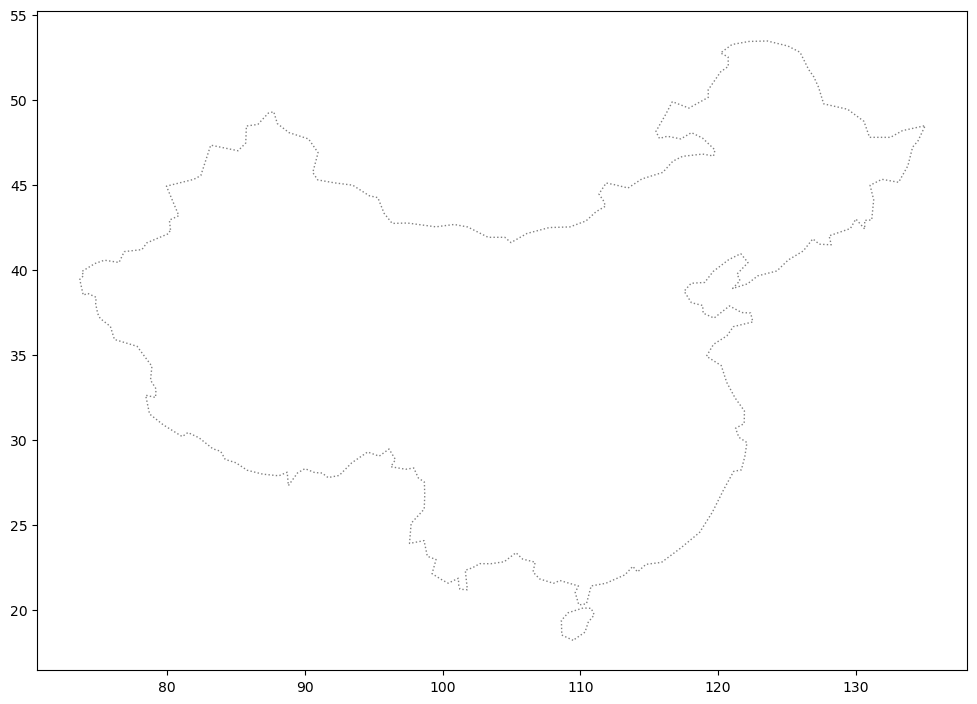

In [3]:
# 画国家的边境线
# alpha 透明度
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = world.loc[world.name.str.contains('China')]
ax = china.plot(figsize=(12, 12), color='white',
                linestyle=':', edgecolor='gray')
# path.plot(ax=ax, color='red', markersize=30, alpha=0.4)
# 根据Point画出Line

## 交互式地图

### 初始化交互地图

In [33]:
# Create a map
m_1 = folium.Map(location=[39.877454, 116.390760],
                 tiles='openstreetmap', zoom_start=4)

# Display the map
m_1

### 准备坐标数据

In [5]:
citys = pd.DataFrame({'Name': ['北京', '成都'], 'Latitude': [
                     39.877454, 30.571925], 'Longitude': [116.390760, 104.081128]}, index=['bj', 'cd'])
citys

,Name,Latitude,Longitude
bj,北京,39.877454,116.390760
cd,成都,30.571925,104.081128


In [6]:
landscapes_data = [
    ['黄龙溪', 103.97, 30.32, 1],
    ['黑龙滩景区', 104.04, 30.07, 1],
    ['三岔湖景区', 104.27, 30.28, 1],
    ['珍珠湖景区', 115.77, 40.08, 1],
    ['金顶妙峰景区', 116.02, 40.06, 1],
    ['猫耳山', 115.88, 39.74, 1],
    ['金沙遗址博物馆', 104.01, 30.68, 1],
    ['石人公园', 104.03, 30.68, 1],
    ['清水河公园', 103.99, 30.66, 1]
]

landscapes = pd.DataFrame(landscapes_data, columns=['Name','Longitude','Latitude','Priority'])
landscapes

,Name,Longitude,Latitude,Priority
0,黄龙溪,103.97,30.32,1
1,黑龙滩景区,104.04,30.07,1
2,三岔湖景区,104.27,30.28,1
3,珍珠湖景区,115.77,40.08,1
4,金顶妙峰景区,116.02,40.06,1
5,猫耳山,115.88,39.74,1
6,金沙遗址博物馆,104.01,30.68,1
7,石人公园,104.03,30.68,1
8,清水河公园,103.99,30.66,1


### 标记地图上的点
使用Marker或者MarkerCluster标记地图上的点

In [7]:
for idx, row in citys.iterrows():
	Marker([row.Latitude, row.Longitude]).add_to(m_1)
m_1

In [8]:
mc = MarkerCluster()
for idx, row in landscapes.iterrows():
	mc.add_child(Marker([row.Latitude, row.Longitude]))

m_1.add_child(mc)
m_1

### 使用气泡(圆圈)标记

In [9]:
def color_producer(val):
	if val == 1:
		return 'forestgreen'
	elif val == 2:
		return 'darkred'
	else:
		return 'black'

for i in range(0, len(landscapes)):
	Circle(location=[landscapes.iloc[i].Latitude, landscapes.iloc[i].Longitude], 
				radius=20, 
				color=color_producer(landscapes.iloc[i].Priority)).add_to(m_1)

m_1

### 热力图
示例：景点密度高的地方，树夏奶茶店是否也多？

In [10]:
museum = pd.read_csv('./data/museum.csv')
museum.head()

,name,lng,lat,address
0,成都博物馆新馆,104.070117,30.663395,四川省成都市青羊区小河街1号
1,四川博物院,104.040528,30.667087,四川省成都市青羊区浣花南路251号
2,成都金沙遗址博物馆,104.019116,30.687743,成都市青羊区金沙遗址路2号
3,成都武侯祠博物馆,104.054572,30.652582,四川省成都市武侯区武侯祠大街231号
4,生命奥秘博物馆(今站购物中心店),104.073031,30.663908,四川省成都市青羊区人民中路一段天府广场今站购物中心负一楼


In [21]:
shuxia = pd.read_csv('./data/shuxia.csv')
shuxia_clean = shuxia[shuxia.name.str.contains('树夏')]
shuxia_clean


,name,lng,lat,address
0,树夏·生榨鲜果茶(建设路店),104.109230,30.676795,四川省成都市成华区建设中路15号
1,树夏(金色校园广场店),103.997108,30.555497,四川省成都市双流区长城路二段481号
2,树夏·生榨鲜果茶(二十四城店),104.123387,30.650327,四川省成都市成华区双成三路15号附73号
3,树夏(成都银泰城店),104.064850,30.546907,四川省成都市高新区益州大道中段1999号成都银泰城F1
4,树夏(中铁西城·新天地店),103.970183,30.678981,四川省成都市青羊区光华东二路98号中铁西城·新天地F1
...,...,...,...,...
72,树夏生榨鲜果茶(文殊坊店),104.079264,30.678110,四川省成都市青羊区楞伽庵街4号
73,树夏美甲美睫,103.978356,30.809383,成都市郫都区蜀源大道府河别样城
74,树夏生榨鲜果茶(北城天街店),104.071550,30.714947,四川省成都市金牛区五块石车北城天街b1层90号
75,树夏花开(三圣乡店),104.139760,30.592516,幸福联合五组147号附1号


In [24]:
# Create a map
m_2 = folium.Map(location=[30.571925, 104.081128],
                 tiles='openstreetmap', zoom_start=10)
# Display the map
HeatMap(data=museum[['lat', 'lng']], radius=10).add_to(m_2)

mc = MarkerCluster()
for idx, row in shuxia_clean.iterrows():
	mc.add_child(Marker([row.lat, row.lng], popup=row['name']))

mc.add_to(m_2)

m_2

## 坐标系统
使用crs修改坐标系统

[EPSG:2272](https://epsg.io/2272)

### 坐标映射

In [48]:
museum_geo = gpd.GeoDataFrame(museum, geometry=gpd.points_from_xy(museum.lng, museum.lat))
museum_geo.crs = {'init': 'epsg:4326'}
museum_geo.head()

/Users/hawkins/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,name,lng,lat,address,geometry
0,成都博物馆新馆,104.070117,30.663395,四川省成都市青羊区小河街1号,POINT (104.07012 30.66340)
1,四川博物院,104.040528,30.667087,四川省成都市青羊区浣花南路251号,POINT (104.04053 30.66709)
2,成都金沙遗址博物馆,104.019116,30.687743,成都市青羊区金沙遗址路2号,POINT (104.01912 30.68774)
3,成都武侯祠博物馆,104.054572,30.652582,四川省成都市武侯区武侯祠大街231号,POINT (104.05457 30.65258)
4,生命奥秘博物馆(今站购物中心店),104.073031,30.663908,四川省成都市青羊区人民中路一段天府广场今站购物中心负一楼,POINT (104.07303 30.66391)


In [49]:
shuxia_clean_geo = gpd.GeoDataFrame(shuxia_clean, geometry=gpd.points_from_xy(shuxia_clean.lng, shuxia_clean.lat))
shuxia_clean_geo.crs = {'init': 'epsg:4326'}
shuxia_clean_geo.head()

/Users/hawkins/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,name,lng,lat,address,geometry
0,树夏·生榨鲜果茶(建设路店),104.109230,30.676795,四川省成都市成华区建设中路15号,POINT (104.10923 30.67679)
1,树夏(金色校园广场店),103.997108,30.555497,四川省成都市双流区长城路二段481号,POINT (103.99711 30.55550)
2,树夏·生榨鲜果茶(二十四城店),104.123387,30.650327,四川省成都市成华区双成三路15号附73号,POINT (104.12339 30.65033)
3,树夏(成都银泰城店),104.064850,30.546907,四川省成都市高新区益州大道中段1999号成都银泰城F1,POINT (104.06485 30.54691)
4,树夏(中铁西城·新天地店),103.970183,30.678981,四川省成都市青羊区光华东二路98号中铁西城·新天地F1,POINT (103.97018 30.67898)


### 测量地图上两个点的距离

In [50]:
# 随意选一个树夏店
first_shuxia = shuxia_clean_geo.iloc[0]

# 测量这个店铺和各个博物馆的距离
distances = museum_geo.geometry.distance(first_shuxia.geometry)
distances

/var/folders/5s/hp2lrr6s28dcft7pjdnx9w3c0000gn/T/ipykernel_88132/2840251939.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = museum_geo.geometry.distance(first_shuxia.geometry)


0      0.041345
1      0.069385
2      0.090777
3      0.059781
4      0.038425
         ...   
145    0.091169
146    0.510291
147    0.502590
148    0.514630
149    0.274640
Length: 150, dtype: float64

In [31]:
print('最近的博物馆是：{} 距离: {}'.format(
      museum_geo.iloc[distances.idxmin()][['name']], distances.min()))


最近的博物馆是：name    天府四川金融博物馆
Name: 38, dtype: object 距离: 0.009272152554825998


创建缓冲区

In [42]:
two_mile_buffer = museum_geo.geometry.buffer(2)
two_mile_buffer.head()

0    POLYGON ((106.070 30.663, 106.060 30.467, 106....
1    POLYGON ((106.041 30.667, 106.031 30.471, 106....
2    POLYGON ((106.019 30.688, 106.009 30.492, 105....
3    POLYGON ((106.055 30.653, 106.045 30.457, 106....
4    POLYGON ((106.073 30.664, 106.063 30.468, 106....
dtype: geometry

In [43]:
# Create a map
m_3 = folium.Map(location=[30.571925, 104.081128],
                 tiles='openstreetmap', zoom_start=11)

# HeatMap(data=shuxia_clean_geo[['lat','lng']], radius=15).add_to(m_3)
# for idx, row in museum_geo.iterrows():
# 	Marker([row.lat, row.lng]).add_to(m_3)

GeoJson(two_mile_buffer.to_crs(epsg=2272)).add_to(m_3)
# Display the map
m_3
